# Clustering Algorithms Lab

## Objective

In this lab, we'll generate a dataset and learn to make use of K-Means Clustering with the help of sklearn. We'll also learn 2 techniques for evaluating the quality of our clusters when we don't know how many clusters the dataset is actually supposed to contain.

### Getting Started

Since the algorithms we are working with are unsupervised, it can sometimes be tough to tell if they're actually working as well as we want them to when clustering our data. For learning purposes, we'll use sklearn to generate a dataset for us that matches our specifications.  This will make it easier for us to evaluate the performance of our clustering results, because real -world data would be inherently messier. 

Run the cell below to import everything we'll need for this lab.  

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
%matplotlib inline  

Now, we'll use the `make_blobs()` function to generate a dataset for us to work with.  

In the cell below, call `make_blobs()` to create a dataset with the following specifications:

* Number of samples should be `400`
* Each sample should contain `2` features.
* The dataset should have `7` centers.
* The Standard Deviation should be `0.8` for each cluster.

Note the keyword arguments for the function were not provided in the specification above.  You'll either need to inspect `make_blobs()` using a `?`, or go to the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) to figure out what keywords correspond to each of the parameters specified above.  



In [2]:
x, y = make_blobs(n_samples=400, n_features=2, centers=7, cluster_std=0.8)

Now, run the cell below to visualize the dataset we've created. 

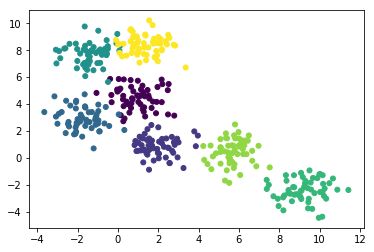

In [3]:
plt.scatter(x[:, 0], x[:, 1], c = y, s = 25);

In this image, you can see the clusters as they are generated. Let's now see if the k means clustering algorithm can discover these clusters in our dataset.

In the cell below:

* Create a `KMeans` object and set `n_clusters` to `7`.
* `fit()` the `k_means` object to the data stored in `X`.
* Generate cluster predictions with `k_means` and store the results in `y_hat`.

As always, don't hesitate to look at the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) if you're unsure how to proceed.  

In [5]:
# dont forget to fit the model!

k_means = KMeans(n_clusters = 7)
k_means.fit(x)
y_hat = k_means.predict(x)

Great! Now, run the cell below to visualize the results of our k-means clustering algorithm!

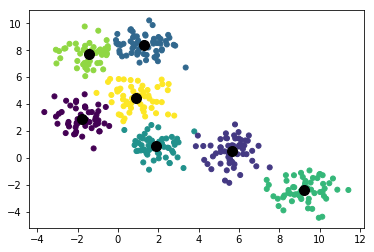

In [6]:
plt.scatter(x[:, 0], x[:, 1], c = y_hat, s = 25)
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100);

As you can see, the algorithm is pretty good at identifying the clusters. Do keep in mind that for a real data set, you will not be able to evaluate the method as such, as we don't know a priori what the clusters should be. This is the nature of unsupervised learning. The Scikit learn documentation does suggest two methods to evaluate your clusters when the "ground truth" is not known: the Silhouette coefficient and the Calinski-Harabaz Index. We'll talk about them later, but first, let's look at the Scikit learn options when using the KMeans function.

We'll discuss two important parameters which we haven't specified before: `init` and `algorithm`.

`init` specifies the method for initialization:

- `k-means++` is the default method, this method selects initial cluster centers in a smart way in order to pursue fast convergence.
- `random`: choose k random observations for the initial centroids.
- `ndarray`: you can pass this argument and provide initial centers.

`algorithm` specifies the algorithm used:

- If `full` is specified, a full EM-style algorithm is performed. EM is short for "Expectation Maximization" and its name is derived from the nature of the algorithm, where in each iteration an E-step (in the context of K-means clustering, the points are assigned to the nearest center) and an M-step (the cluster mean is updated based on the elements of the cluster) is created. 
- The EM algorithm can be slow. The `elkan` variation is more efficient, but not available for sparse data.
- The default is `auto`, and automatically selects `full` for sparse data and `elkan` for dense data. 




## 4. Evaluating k means when labels are not known.

### 4.1 The silhouette coefficient

If the actual cluster labels are unknown, the model itself must be used for evaluation. When calculating the Silhouette Coefficient, a higher score means that you ended up with a model with better defined clusters. Two scores are used to generate the silhouette coefficient:

- **a** is the average distance between one data sample and all other points in the same cluster
- **b**: The average distance between one data sample and all other points in the next nearest cluster.

The silhouette coefficient is then given by:

$$ s = \dfrac{(b-a)}{max(b-a)} $$

let's calculate the silhouette score for the model we created above.  

In the cell below:

* Import the `metrics` module from sklearn.
* Store the `labels_` from our model in the `labels` variable
* Call the `silhouette_score()` function, which can be found inside of the `metrics` module.  Pass in the data `X`, `labels`, and set the `metric` parameter equal to `euclidean`.

In [7]:

from sklearn import metrics
labels = k_means.labels_

metrics.silhouette_score(x, labels, metric='euclidean')
# Call silhouette_score() below!


0.5628473532993684

Obviously, this number isn't very informative by itself, it only really is informative when you compare it to another coefficient. Let's look at the coefficient when we would have fitted a model with only 6 clusters.

In the cell below:

* Create another `KMeans` model.  Set the `n_clusters` parameter to `6`.
* Fit this model to our dataset, `X`.
* Make predictions with this model and store them in `yhat_6`.
* Copy over the visualization code from above and modify as necessary to visualize the clusters created by this model. 

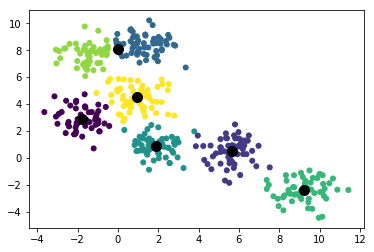

In [8]:
k_means_6 = None
# Don't forget to fit this model, too!
k_means_6 = KMeans(n_clusters = 6)
k_means_6.fit(x)
yhat_6 = k_means_6.predict(x)
plt.scatter(x[:, 0], x[:, 1], c = y_hat, s = 25)
cl_centers_6 = k_means_6.cluster_centers_
plt.scatter(cl_centers_6[:, 0], cl_centers_6[:, 1], c='black', s=100);

yhat_6 = None

# Import and modify the visualization code below this line!

Now, in the cell below, calculate the silhouette score for this new model, so that we can compare it to the model with 7 clusters. 

In [9]:
#labels_6 = None

labels_6 = k_means_6.labels_
metrics.silhouette_score(x, labels_6, metric='euclidean')
# Generate a silhouette score for this model below this line!

0.551028192209062

Seems like 7 clusters generated a better result according to the silhouette coefficient!

### 4.2 Calinski-Harabaz Index

Very similarly to the silhouette coefficient, the Calinski-Harabaz index (`sklearn.metrics.calinski_harabaz_score`) can be used to evaluate the model when class labels are not known a priori. Again, a higher CH score means that the model has better defined clusters.

When you have k clusters, the score s is a ratio of the between-cluster dispersion, and the within-cluster dispersion.

$$ s(k) = \dfrac{Tr(B_k)}{Tr(W_k)}\times \dfrac{N-k}{k-1}$$

Here, the between group dispersion matrix is $B_k$ and the withing dispersion matrix is $W_k$:

$$W_k = \sum^k_{q=1} \sum_{x\in C_q} (x - c_q)(x-c_q)^T$$
$$B_k = \sum_{q} n_q (c_q - c)(c_q-c)^T$$

where 

- $N$ is the data size
- $C_q$ represents the samples in cluster $q$
- $c_q$ represents the center of cluster $q$
- $c$ the center of $E$
- $n_q$ the number of samples in cluster $q$.

To wrap this lab up, let's generate Calinski-Harabaz scores for both of the models we created above.  

You'll find the `calinski_harabaz_score()` function inside the `metrics` module, just like `silhouette_score`.  Call this function now to generate a score for the model with 7 clusters. 

In [10]:
metrics.calinski_harabaz_score(x, labels)  

1414.350976005445

Now, call it for the model with 6 clusters, so that we can compare the scores for each.  The higher score is the one that better fits the data. 

In [11]:
metrics.calinski_harabaz_score(x, labels_6)  

1155.4082882843488

Also here, the CH index is higher for the model with 7 clusters!

Sources: 
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
http://scikit-learn.org/stable/modules/clustering.html